



# **Analytics 2 :** <font color=#DF4807>**Extracting Meaning from Text**</font>





**Objectives**:
1. Analysis of UN General debates dataset
2. Information extraction from speeches of selected country

Download the data from my drive at the following link:

https://drive.google.com/file/d/1fqnrRjz6i9zNximX3UqP_5dhL60AIbJo/view?usp=sharing


In [ ]:
#import  libraries
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#import data by navigating to the correct location on your gooogle drive.
df = pd.read_csv('un-general-debates.csv')
df.head()

,session,year,country,text
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...
4,44,1989,ZWE,﻿I should like at the outset to express my del...


Every year, representatives of UN member states gather and deliver speeches that present their government’s viewpoints on global and domestic issues.
The dataset we will use contains speeches from the member states dating back from 1970 until 2016.


**Your tasks:**

1) Choose either your own country or a country you are interested in and extract all the speeches delivered over the years.

2) What have been the top 10 most frequent words over time? In other words, do the most frequent words used, reflect the mindset of that country in the given time?

2) Extract the NER Tags. Write a function that takes an NER tag as input and returns relevant chunks of text or important key words.

4) Using cosine similarities and tfidf, can you determine which other country has the same outlook as the country you have selected? Can you determine allies from enemies this way?

5) Any exploratory analysis you like.

In [7]:
df['country']

0       MDV
1       FIN
2       NER
3       URY
4       ZWE
       ... 
7502    KAZ
7503    LBR
7504    BDI
7505    HUN
7506    KWT
Name: country, Length: 7507, dtype: object

In [8]:
df['country'].unique()

array(['MDV', 'FIN', 'NER', 'URY', 'ZWE', 'PHL', 'SDN', 'RUS', 'CHN',
       'ESP', 'SUR', 'ARG', 'SLV', 'MYS', 'NPL', 'PRT', 'COL', 'BLR',
       'MAR', 'LCA', 'EGY', 'MEX', 'BEL', 'BRN', 'RWA', 'CAN', 'ALB',
       'GRC', 'KNA', 'GUY', 'LBR', 'ATG', 'MOZ', 'JPN', 'YDYE', 'GAB',
       'BGD', 'SWE', 'TUR', 'TCD', 'SYR', 'CMR', 'JAM', 'LUX', 'ITA',
       'AGO', 'CRI', 'CSK', 'BFA', 'MNG', 'BHR', 'HTI', 'OMN', 'CIV',
       'TGO', 'CYP', 'MUS', 'MMR', 'ARE', 'GTM', 'GRD', 'LBY', 'LKA',
       'TZA', 'SGP', 'NOR', 'LAO', 'ISL', 'AFG', 'CHL', 'DMA', 'UKR',
       'KEN', 'BLZ', 'FRA', 'MLI', 'VCT', 'VEN', 'MLT', 'GHA', 'GIN',
       'GBR', 'ISR', 'YUG', 'BRB', 'IRQ', 'HUN', 'AUT', 'POL', 'GNB',
       'BWA', 'MRT', 'SWZ', 'DNK', 'DOM', 'MDG', 'NIC', 'BDI', 'CUB',
       'IRN', 'PAK', 'SEN', 'BGR', 'YEM', 'STP', 'NLD', 'VUT', 'BOL',
       'PNG', 'SLB', 'DEU', 'ROU', 'KHM', 'TUN', 'BRA', 'IND', 'IDN',
       'AUS', 'COD', 'HND', 'GNQ', 'FJI', 'IRL', 'DZA', 'USA', 'LSO',
       'GMB', 'PER'

In [9]:
#task 1
country_selected = df[df['country'].isin(['IND','PAK'])]
countries_text = country_selected['text'].to_list()[:20]

In [10]:
import spacy
import re
import nltk
nltk.download('stopwords')

nlp = spacy.load('en_core_web_sm')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

c:\Users\Poorn\anaconda3\envs\gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Poorn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#task 2

text = ' '.join(countries_text)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# Fit and transform the text documents
count_vector = cv.fit_transform(text.split())

# Create a pandas DataFrame
df = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names())

def remove_stop_words(word):
    if word  not in stop_words:
        return word
    else:
        return ''

df_without_stopwords = df.loc[:,df.columns[~df.columns.isin(stop_words)]]
# Top 10 Frequently used word
df_without_stopwords.sum().sort_values(ascending=False).apply(remove_stop_words)[:10]

nations          421
united           376
world            319
countries        308
international    290
india            255
nuclear          249
pakistan         248
peace            241
people           212
dtype: int64

In [13]:
#task 3

def handle_entity_extraction(ner_tag,text):
    """
    
    Takes two argument ner_tag Name Entity tags and the text that needs to be tokenized.
    returns a all_words with it's frequency
    """ 
    all_words = {}
    for each in text:
        doc = nlp(each)

        # print(all_words)
        for word in doc.ents:

            if word.label_ == ner_tag:
                try:
                    all_words[word.text] += 1
                except:
                    all_words[word.text] = 1

    #Prints the text and it's frequency in the descending order
    for text in sorted(all_words.items(), key=lambda x: x[-1], reverse=True)[:10]:
        print(f"The text is '{text[0]}' and the frequency: {text[1]}")
    return all_words
handle_entity_extraction('GPE',countries_text)

The text is 'India' and the frequency: 243
The text is 'Pakistan' and the frequency: 242
The text is 'States' and the frequency: 89
The text is 'Afghanistan' and the frequency: 70
The text is 'South Africa' and the frequency: 51
The text is 'Namibia' and the frequency: 33
The text is 'Israel' and the frequency: 31
The text is 'Jammu' and the frequency: 27
The text is 'Palestine' and the frequency: 22
The text is 'Pretoria' and the frequency: 18


{'Pakistan': 242,
 'Nigeria': 1,
 'Afghanistan': 70,
 'Kabul': 9,
 'Scud': 1,
 'Palestine': 22,
 'Israel': 31,
 'Pretoria': 18,
 'South Africa': 51,
 'Namibia': 33,
 'Iran': 13,
 'Iraq': 9,
 'States': 89,
 'Bulgaria': 1,
 'Turkey': 3,
 'North-South': 2,
 'the united States': 1,
 'the Soviet Union': 17,
 'India': 243,
 'Jammu': 27,
 'Islamabad': 2,
 'the United States-Palestine Liberation Organization': 1,
 'Lebanon': 3,
 'Paris': 6,
 'Cambodia': 18,
 'Cyprus': 5,
 'Esquipulas': 1,
 'Tela': 1,
 'Korea': 5,
 'Fiji': 4,
 'New Zealand': 1,
 'Myanmar': 5,
 'the United States': 15,
 'Egypt': 2,
 'Venezuela': 1,
 'Senegal': 1,
 'France': 4,
 'Canada': 3,
 'Mexico': 3,
 'Colombia': 2,
 'Stockholm': 1,
 'Belgrade': 1,
 'Norway': 2,
 'Liberia': 3,
 'Finland': 1,
 'Helsinki': 3,
 'Vienna': 2,
 'the Federal Republic of Germany': 2,
 "the People's Republic of China": 5,
 'China': 4,
 'Formosa': 2,
 'IndoChina': 2,
 'Moscow': 1,
 'Yugoslavia': 1,
 'Tunisia': 1,
 'Romania': 1,
 'Peru': 1,
 'Portugal'

In [15]:
df = pd.read_csv(u'un-general-debates.csv',encoding='utf-8')
df.head()

,session,year,country,text
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...
4,44,1989,ZWE,﻿I should like at the outset to express my del...


In [16]:
df.shape

(7507, 4)

In [21]:
text_of_india = df['text'][df['country'] == 'IND'].to_list()
text_of_other_countries =  df['text'][df['country'] != 'IND'].to_list()

In [23]:

#task 4

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the text documents to get the TF-IDF matrix
X = vectorizer.fit_transform(df['text'].to_list())

# Get the feature names (unique words)
feature_names = vectorizer.get_feature_names()

# Vectorizing the text of India
vector_for_india = vectorizer.transform(text_of_india)
# Vectorizing the text of excluding India
vector_for_other_countries = vectorizer.transform(text_of_other_countries)

from sklearn.metrics.pairwise import cosine_similarity


# Calculate cosine similarity
cosine_sim = cosine_similarity(vector_for_india,vector_for_other_countries)
similarity = cosine_sim[0][0]
print("Cosine similarity:", similarity)

Cosine similarity: 0.8964172239089572


In [24]:
import numpy as np

k = 10  # Number of most similar vectors to retrieve
most_similar_indices = np.argsort(-cosine_sim)[0]
# Top 10 country that are similar to the india's Text's
df.loc[most_similar_indices,'country'][:10]


3227    GNQ
2071    TGO
124     USA
2014    NLD
3265    PRT
3067    SAU
4702    GAB
6222    PAK
6492    SUR
493     LKA
Name: country, dtype: object

In [25]:
# Printitng the top country that is similar to the india
gnq = df['text'][df['country'] == 'GNQ'].to_list()
X = vectorizer.transform(gnq)

vector_for_india = vectorizer.transform(text_of_india)
# Calculate cosine similarity
cosine_sim = cosine_similarity(X,vector_for_india)
similarity = cosine_sim[0][0]
print("Cosine similarity:", similarity)

Cosine similarity: 0.8648616869601907


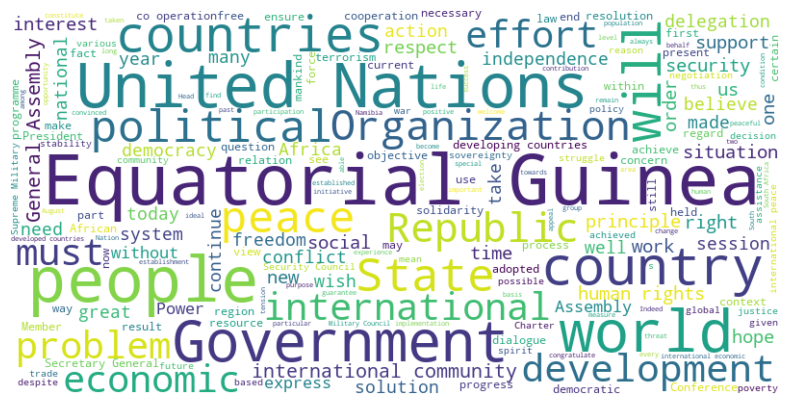

In [27]:
#task 5
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data
text = "word cloud example using wordcloud library in python. Python is great for data analysis and visualization."

# Generate a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(gnq))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
